   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

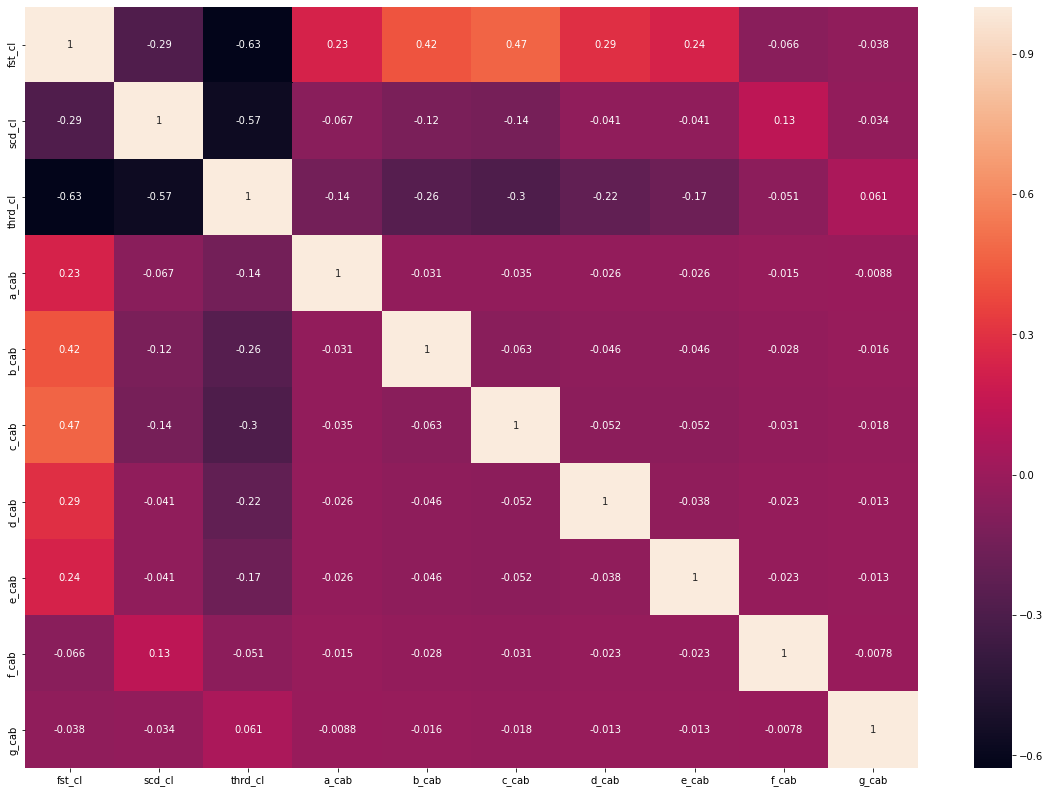

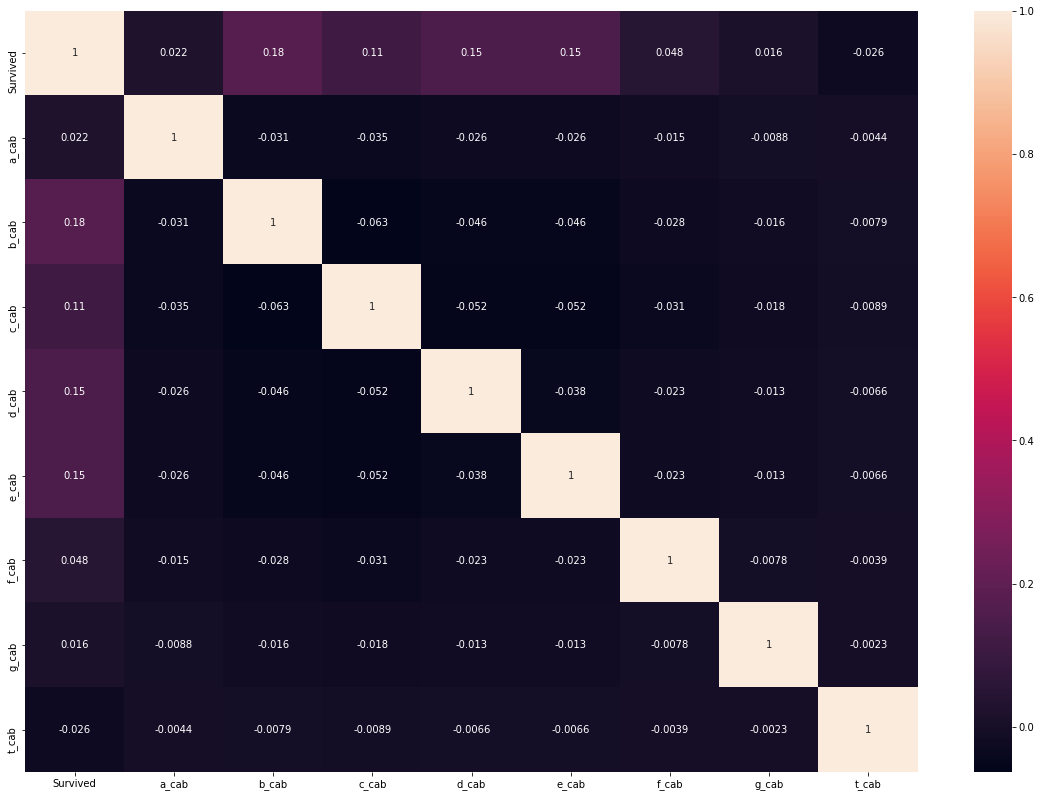

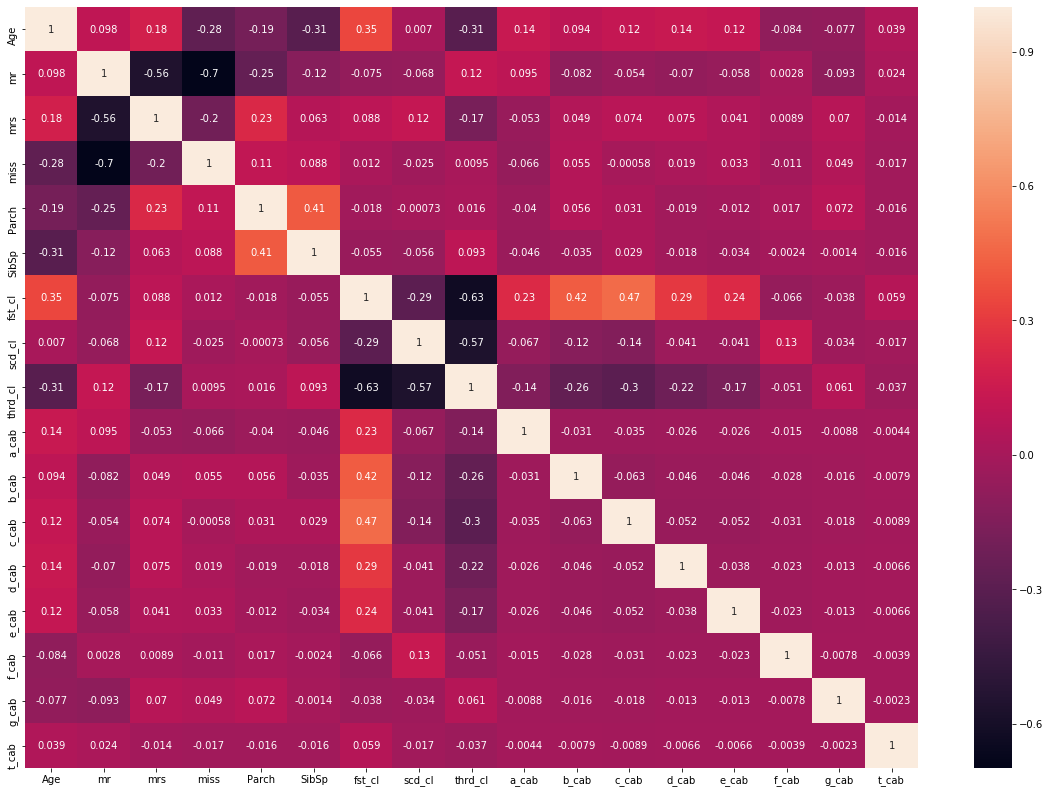

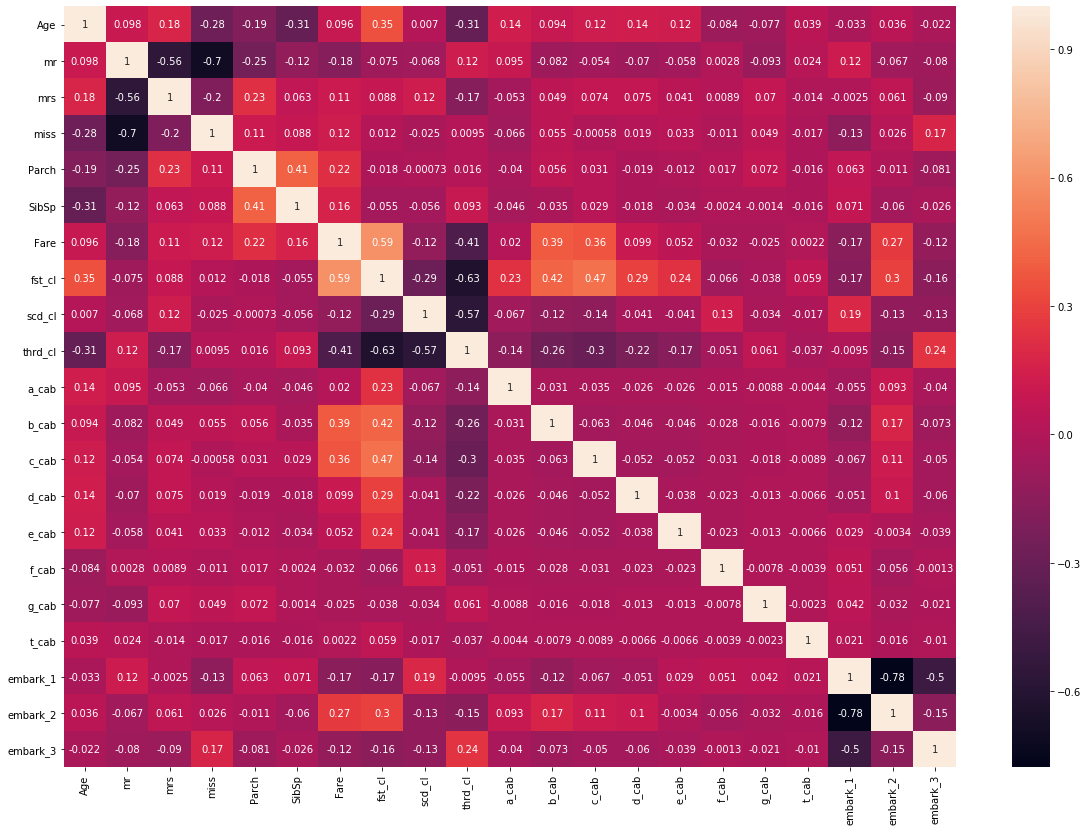

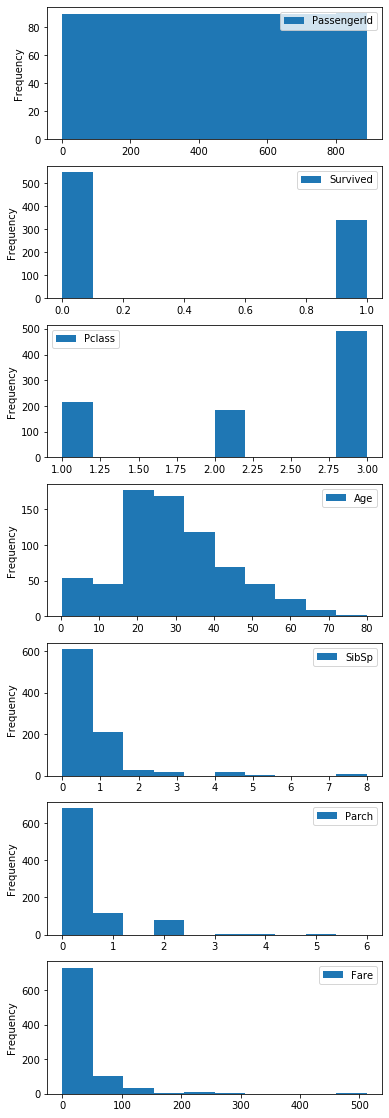

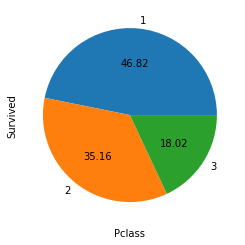

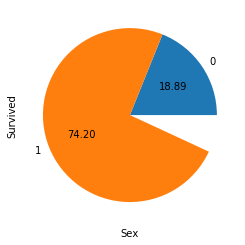

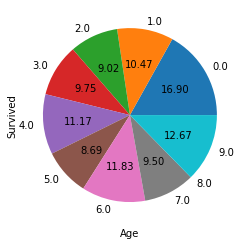

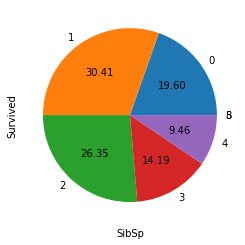

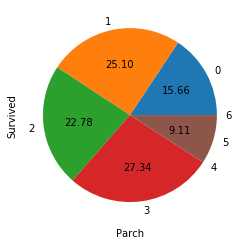

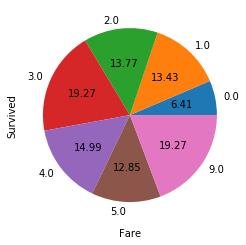

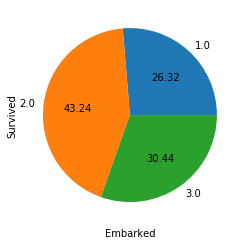

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

#pd.set_option("display.max_rows", None, "display.max_columns", None)

################################### QUICK LOOK, CLEAN UP OF TRIVIAL STUFF ##################################
data_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#six explanatory attributes and the label we're looking to predict
print(data_df.head())

#closer look at the distribution of the features
print(data_df.describe())

#missing values search
print(data_df.info()) # Age, Cabin and embarked have NaN values
print(test_df.info()) #Age, Cabin and fare have NaN values

###### transform Name, Pclass, Embarkment and Cabin into groups (binary switches to be used in reg), explore correlations

################################### CREATE COLUMNS/SPACE TO MAP GROUP VALUES #######################################

def map_space(data_df):
    map_space = pd.DataFrame({'mr': np.zeros(np.size(data_df,0)), 'mrs':np.zeros(np.size(data_df,0)), 'miss':np.zeros(np.size(data_df,0)), 
                              'fst_cl': np.zeros(np.size(data_df,0)), 'scd_cl':np.zeros(np.size(data_df,0)), 'thrd_cl':np.zeros(np.size(data_df,0))
                             , 'embark_1':np.zeros(np.size(data_df,0)), 'embark_2':np.zeros(np.size(data_df,0)), 'embark_3':np.zeros(np.size(data_df,0))
                             , 'a_cab':np.zeros(np.size(data_df,0)), 'b_cab':np.zeros(np.size(data_df,0)), 'c_cab':np.zeros(np.size(data_df,0))
                             , 'd_cab':np.zeros(np.size(data_df,0)), 'e_cab':np.zeros(np.size(data_df,0)), 'f_cab':np.zeros(np.size(data_df,0))
                             , 'g_cab':np.zeros(np.size(data_df,0)), 't_cab':np.zeros(np.size(data_df,0))})
    data_map = pd.concat((data_df,map_space), axis = 1)
    
    return data_map

################################### MAPPING FUNCTION #################################################3
def map_apply(row):
    if row.Name == str(row.Name) and ('Mr.' in row.Name)==True:
        row.mr = 1
        row.Name = 1
        
    if row.Name == str(row.Name) and ('Mrs.' in row.Name) == True:
        row.mrs = 1
        row.Name = 2
        
    if row.Name == str(row.Name) and ('Miss.' in row.Name)==True:
        row.miss = 1
        row.Name = 3
        
    if row.Cabin == str(row.Cabin) and ('A' in row.Cabin)==True:
        row.a_cab = 1
        row.Cabin = 1
    
    if row.Cabin == str(row.Cabin) and ('B' in row.Cabin)==True:
        row.b_cab = 1
        row.Cabin = 2
        
    if row.Cabin == str(row.Cabin) and ('C' in row.Cabin)==True:
        row.c_cab = 1
        row.Cabin = 3
        
    if row.Cabin == str(row.Cabin) and ('D' in row.Cabin)==True:
        row.d_cab = 1
        row.Cabin = 4
        
    if row.Cabin == str(row.Cabin) and ('E' in row.Cabin)==True:
        row.e_cab = 1
        row.Cabin = 5
        
    if row.Cabin == str(row.Cabin) and ('F' in row.Cabin)==True:
        row.f_cab = 1
        row.Cabin = 6
        
    if row.Cabin == str(row.Cabin) and ('G' in row.Cabin)==True:
        row.g_cab = 1
        row.Cabin = 7
        
    if row.Cabin == str(row.Cabin) and ('T' in row.Cabin)==True:
        row.t_cab = 1
        row.Cabin = 8
        
    if row.Pclass == 1:
        row.fst_cl = 1

    if row.Pclass == 2:
        row.scd_cl = 1

    if row.Pclass == 3:
        row.thrd_cl = 1
        
    if row.Embarked == str(row.Embarked) and row.Embarked == 'S':
        row.embark_1 = 1
        row.Embarked = 1
        
    if row.Embarked == str(row.Embarked) and row.Embarked == 'C':
        row.embark_2 = 1
        row.Embarked = 2
        
    if row.Embarked == str(row.Embarked) and row.Embarked == 'Q':
        row.embark_3 = 1
        row.Embarked = 3
        
    if row.Name == str(row.Name) and ('Miss.' in row.Name)==False and ('Mr.' in row.Name)==False and ('Mrs.' in row.Name)==False :
        row.mr = 1   #### otherwise personnel, 'master' or smth, all men
        row.Name = 1

    return row


########################################## HEAT MAP, EXPLORE CORRELATIONS ############################################################

def heat_map(list_cols_you_dont_want, tuple_cols_you_want, data_df):
    
    mapped_df = map_space(data_df).apply(map_apply, axis='columns').drop(columns = list_cols_you_dont_want)
    dat_to_heat = mapped_df.loc[:,tuple_cols_you_want]
    fig, heatmap_plot = plt.subplots(figsize=(20,14))
    heatmap_plot = sns.heatmap(dat_to_heat.corr(), annot=True)
    return heatmap_plot

## is Pclass correlated with cabin level on boat ?
heat_map(list_cols_you_dont_want=['Embarked','Pclass', 'Cabin'], tuple_cols_you_want=('fst_cl','scd_cl','thrd_cl','a_cab','b_cab','c_cab','d_cab','e_cab','f_cab','g_cab'), data_df=data_df)
## is the level of your cabin correlated to survival ?
heat_map(list_cols_you_dont_want=['Embarked','Pclass', 'Cabin'], tuple_cols_you_want=('Survived','a_cab','b_cab','c_cab','d_cab','e_cab','f_cab','g_cab','t_cab'), data_df=data_df)
## what is correlated with Age ?
heat_map(list_cols_you_dont_want=['Embarked','Pclass', 'Cabin'], tuple_cols_you_want=('Age','mr', 'mrs', 'miss','Parch','SibSp','fst_cl','scd_cl','thrd_cl'
                                                                                      ,'a_cab','b_cab','c_cab','d_cab','e_cab','f_cab','g_cab','t_cab'), data_df=data_df)
## correlation check                                                                                 
heat_map(list_cols_you_dont_want=['Embarked','Pclass', 'Cabin'], tuple_cols_you_want=('Age','mr', 'mrs', 'miss','Parch','SibSp','Fare','fst_cl','scd_cl','thrd_cl'
                                                                                      ,'a_cab','b_cab','c_cab','d_cab','e_cab','f_cab','g_cab','t_cab', 'embark_1', 'embark_2', 'embark_3'), data_df=data_df)
#  correlated with embarkment  --->mr,miss,fst_cl,scd_cl, b_cab,thrd_cl,c_cab,d_cab
#  correlated with fare  --->mr,mrs,miss,parch,sibsp,fst_cl,scd_cl,thrd_cl, b_cab,c_cab, embark_1, embark_2, embark_3

########################################## HIST OF FEATURES, EXPLORE DISTRIBUTIONS ############################################################


def feat_hist(data):
    data_df = data.select_dtypes(exclude=['object'])
    nrows = len(data_df.columns.values)
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(6,20))
    
    for att in data_df.columns.values:
        data_df.loc[:,att].plot.hist(ax=axes[np.where(data_df.columns.values==att)[0][0]], legend = True)
    return print('done')

feat_hist(data_df) # we notice that continuous attributes aren't evenly distributed, should scale them for relevant algos

########################################## PIECHARTS ############################################################


### first need to group ages and fares

def binning(data, tuple_what_you_bin):
    bin_est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    dat_to_bin = data.loc[:,tuple_what_you_bin].dropna()
    
    binned_arr = bin_est.fit_transform(dat_to_bin)
    binned_dat = pd.DataFrame(binned_arr, index = data.loc[:,tuple_what_you_bin].dropna().index, columns =tuple_what_you_bin ) 
    data.loc[:,tuple_what_you_bin] = binned_dat.loc[:,tuple_what_you_bin]
    
    return data

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''

def pie_chart(data, info):
    data= data.replace({'male':0, 'female':1, 'S':1, 'C':2, 'Q':3}) 
    data = data.select_dtypes(exclude=['object'])
    data = data.drop(columns = ['PassengerId'])
    for feat in data.columns:
        if feat != 'Survived':
            surv_cnt = data.groupby(feat).Survived.sum()
            cat_cnt = data.groupby(feat).apply(lambda df: df.loc[:,feat].count())
            surv_prop = surv_cnt.div(cat_cnt)
            labels = cat_cnt.index

            fig, ax = plt.subplots()
            plt.ylabel('Survived')
            plt.xlabel(feat)

            ax.pie(surv_prop, labels=labels, autopct=my_autopct)

            if info == True:
                print(' \n ######### survivor count of',feat,'########## \n ')
                print(surv_cnt)
                print(' \n ######### category count of',feat,'########## \n ')
                print(cat_cnt)
                print(' \n ######### proportion of survivors',feat,'########## \n ')
                print(surv_prop) 
            else:
                continue
                

            
pie_chart(binning(data_df, ('Age','Fare')), info=False)

